#### Import Helper Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Data Overview 

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().mean()*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe(include= 'O')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


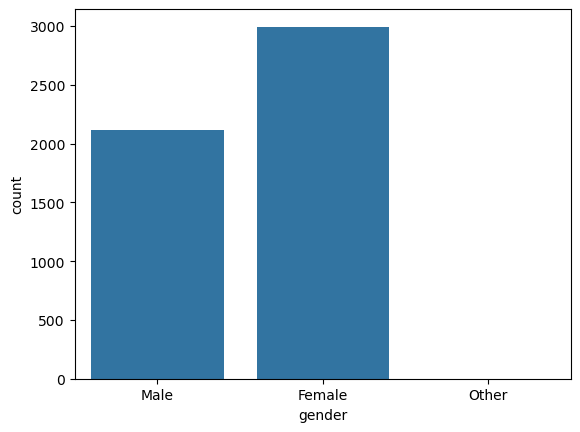

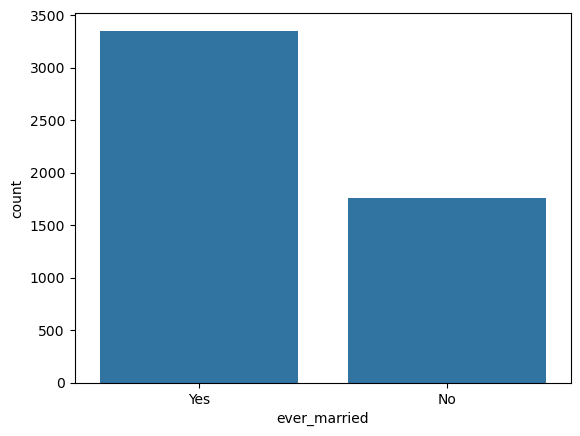

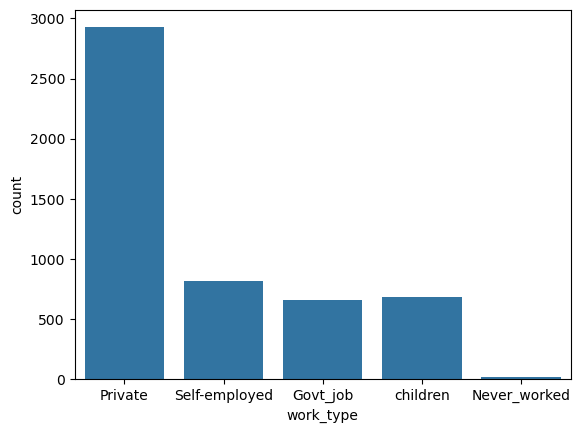

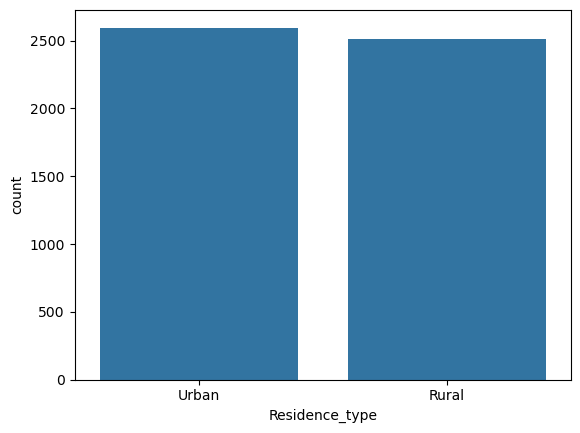

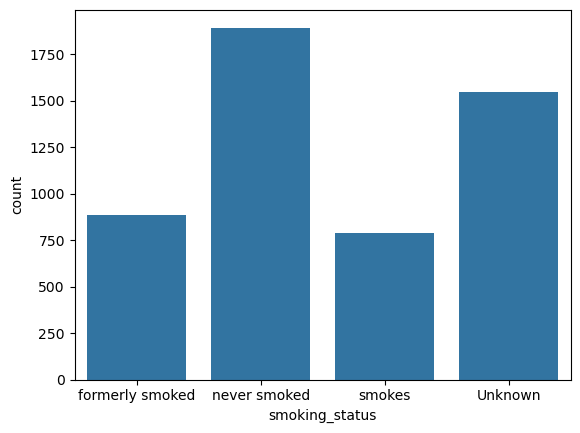

In [9]:
for col in df.select_dtypes('object').columns :
    
    plt.figure()
    sns.countplot(data = df , x = col)
    

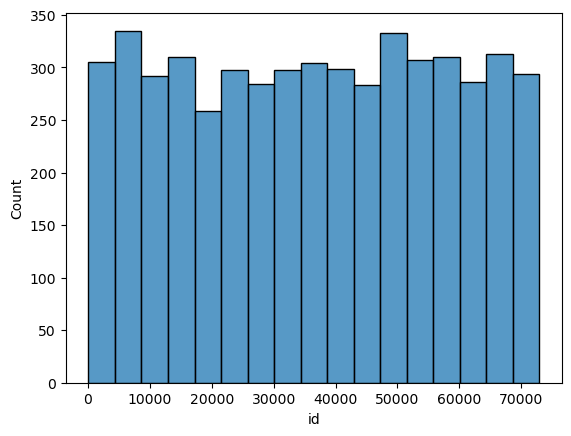

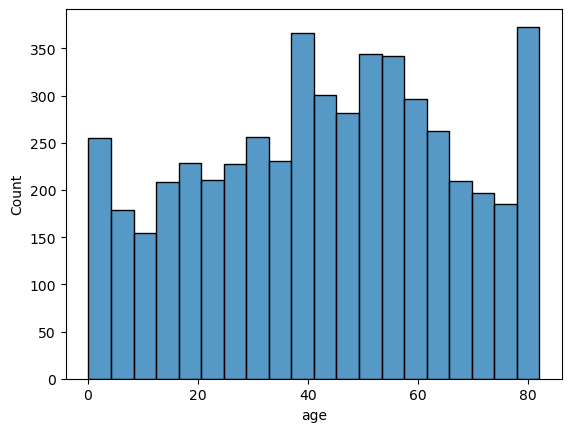

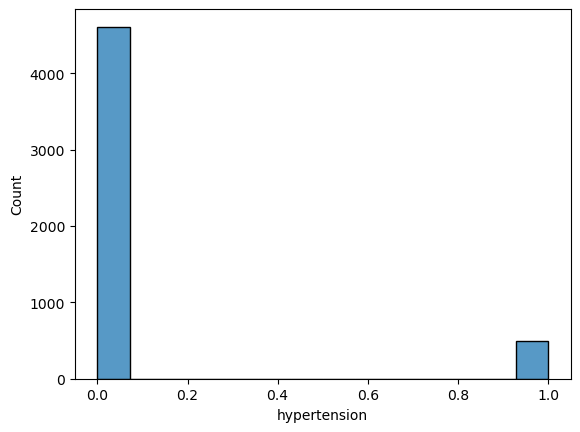

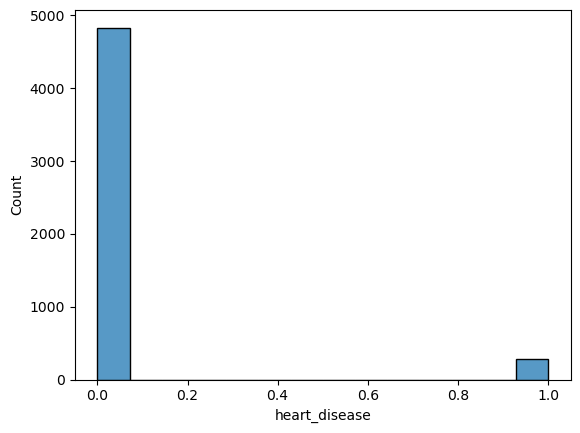

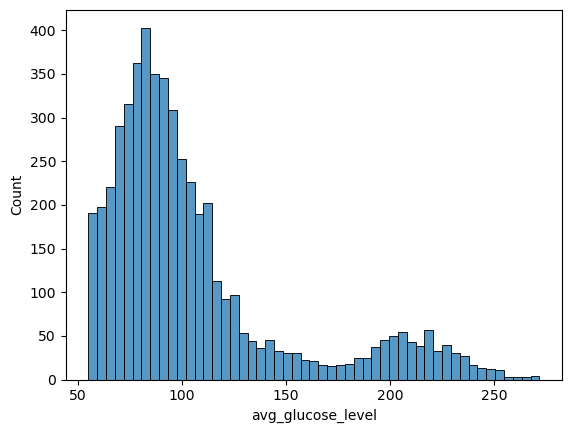

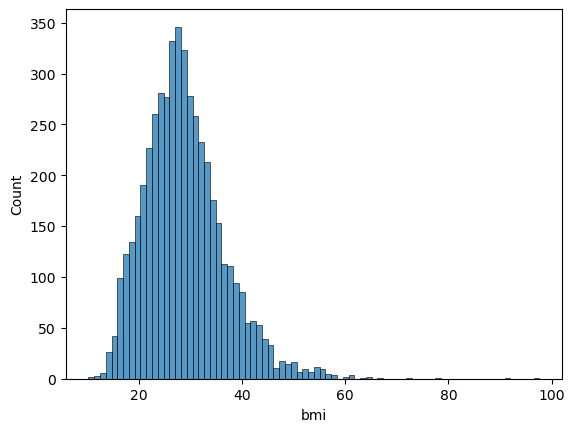

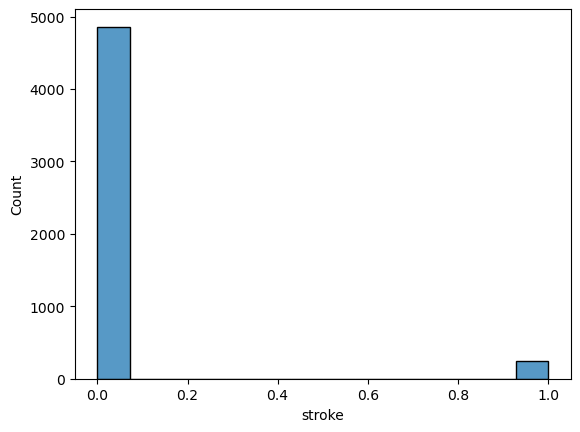

In [10]:
for col in df.select_dtypes('number').columns :
    
    plt.figure()
    sns.histplot(data = df , x = col)
    

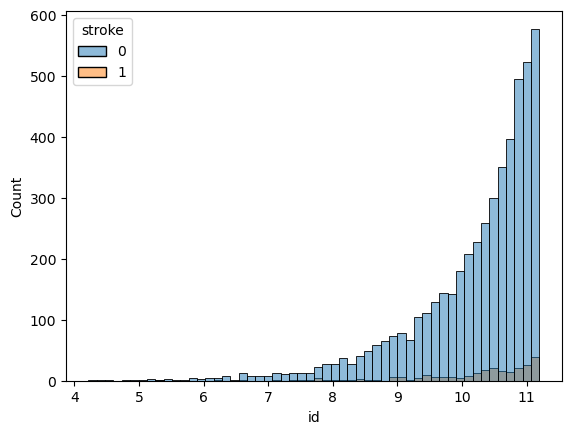

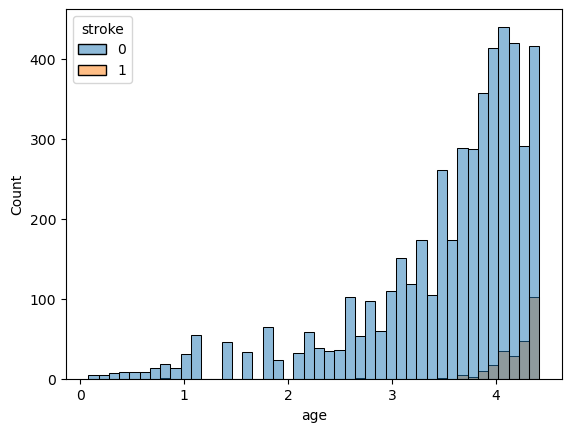

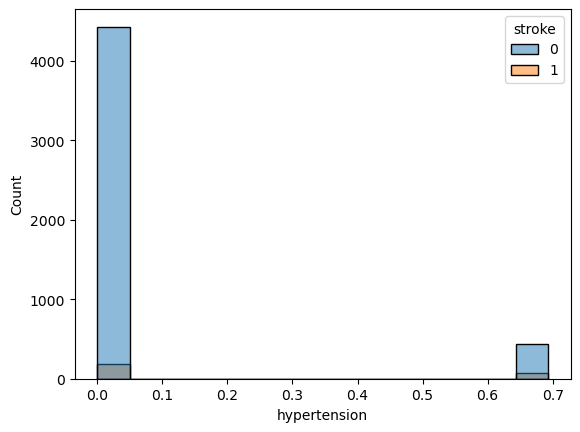

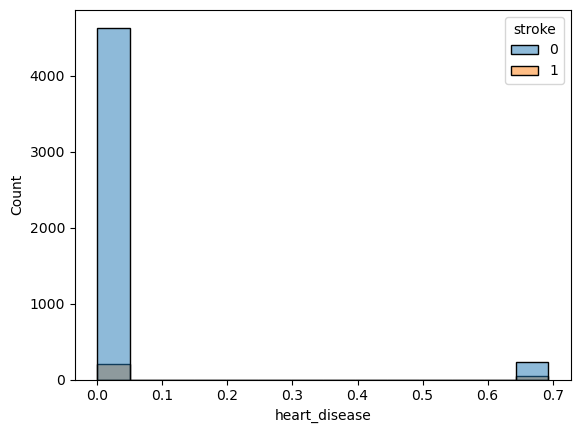

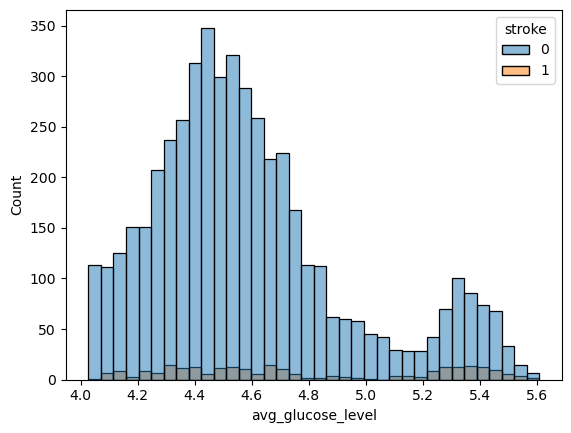

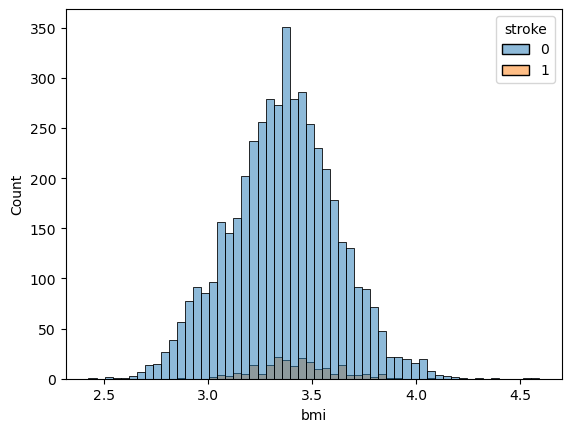

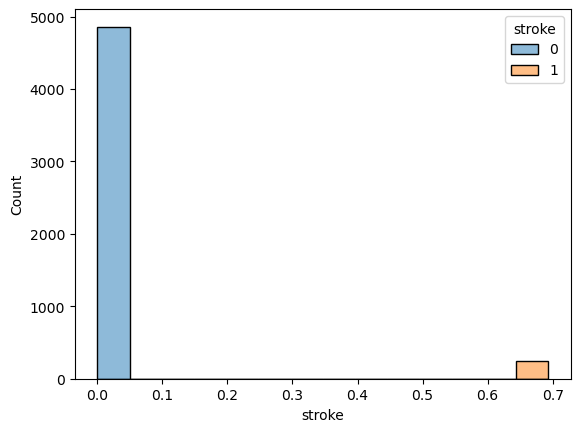

In [11]:
for col in df.select_dtypes('number').columns :
    
    plt.figure()
    sns.histplot(data = df , x = np.log1p(df[col]) , hue = 'stroke')
    

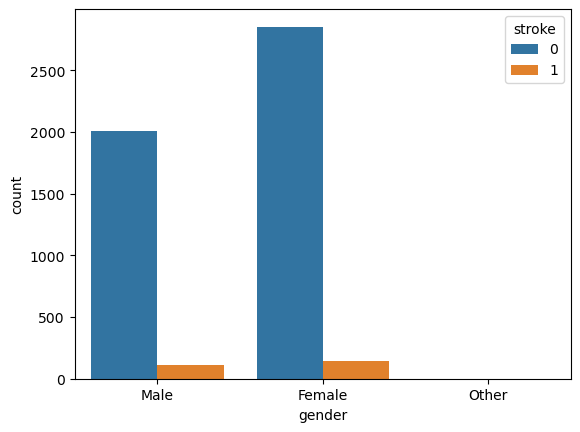

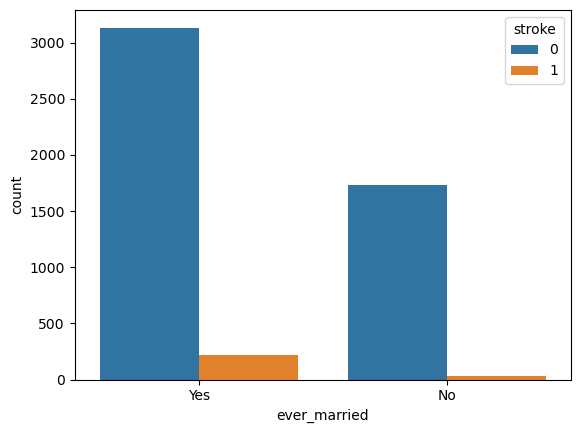

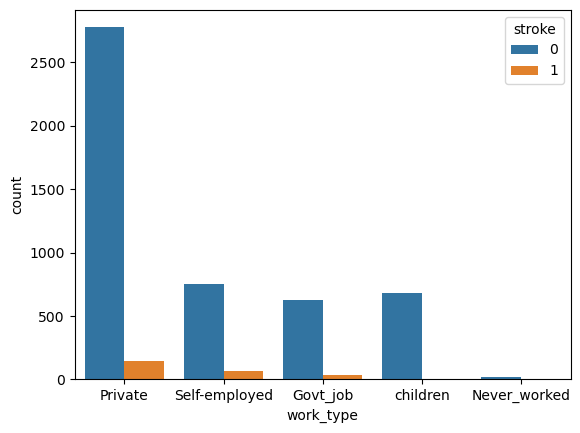

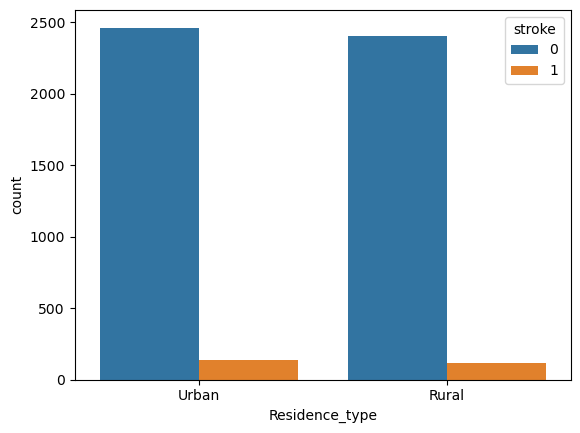

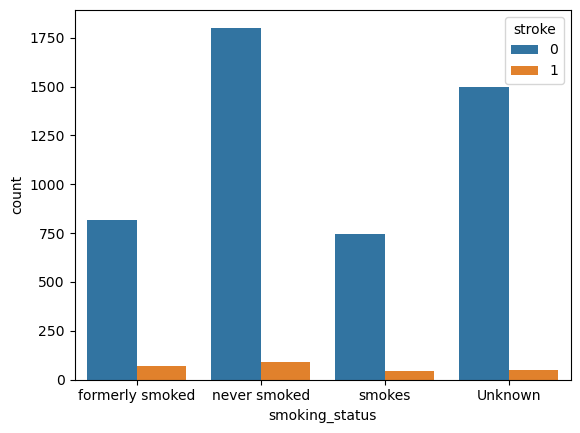

In [12]:
for col in df.select_dtypes('object').columns :
    
    
    plt.figure()
    sns.countplot(data = df , x = col , hue = 'stroke')

In [13]:
# sns.pairplot(df , hue = 'stroke')

<Axes: >

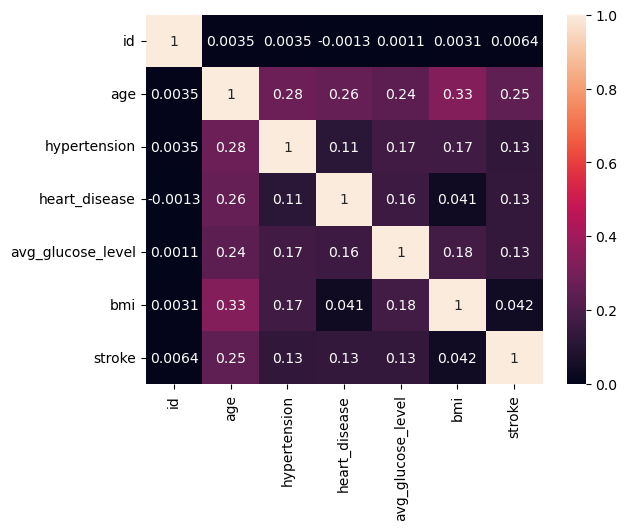

In [14]:
sns.heatmap(df.select_dtypes('number').corr() , annot=True )

### Dropping the Id Column

In [15]:
df.drop('id' , axis = 1 , inplace =True)

### Dealing with Gender

In [16]:
len(df[df.gender == 'Other'])

1

- Only 1 record with the gender other so we will drop this record

In [17]:
df.drop(df[df.gender == 'Other'].index, inplace=True)

### Dealing with work_type

In [18]:
df.work_type.value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [19]:
never_worked_rows = df[df['work_type'] == 'Never_worked']

In [20]:
never_worked_rows

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
603,Male,23.0,0,0,No,Never_worked,Urban,125.26,18.7,never smoked,0
886,Female,19.0,0,0,No,Never_worked,Urban,86.96,25.8,never smoked,0
939,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,Unknown,0
959,Male,17.0,0,0,No,Never_worked,Urban,113.25,23.4,never smoked,0
1462,Male,17.0,0,0,No,Never_worked,Rural,61.01,32.5,Unknown,0
1789,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0
1922,Male,16.0,0,0,No,Never_worked,Urban,59.99,28.2,never smoked,0
2346,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0
2721,Female,17.0,0,0,No,Never_worked,Rural,88.57,31.1,never smoked,0


- I saw that the age of the people who Never_worked is young , so i added them to children

In [21]:
df['work_type'] = df['work_type'].apply(lambda x : 'children' if x == 'Never_worked' else x )

In [22]:
df.work_type.value_counts()

work_type
Private          2924
Self-employed     819
children          709
Govt_job          657
Name: count, dtype: int64

In [23]:
df.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

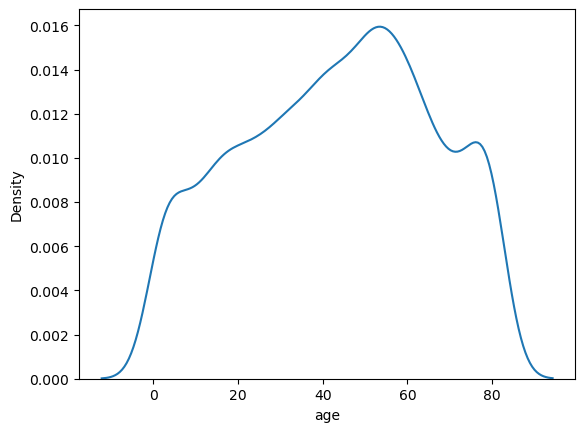

In [24]:
sns.kdeplot(x = df['age'])

###### Categorizing Age into bins 

In [25]:
def categorize_age(age):
    if age < 12:
        return 'Child'
    elif 12 <= age < 19:
        return 'Teenager'
    elif 19 <= age < 35:
        return 'Young Adult'
    elif 35 <= age < 50:
        return 'Middle-aged Adult'
    else:
        return 'Senior'

df['age_category'] = df['age'].apply(categorize_age)

In [26]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Middle-aged Adult
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,Senior
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Senior
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Middle-aged Adult
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Senior


<Axes: xlabel='age_category', ylabel='count'>

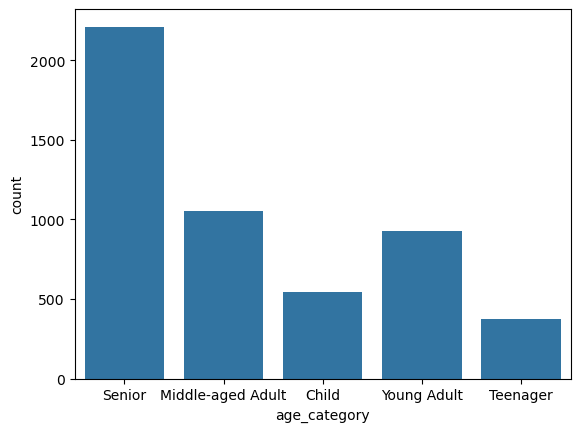

In [27]:
sns.countplot(x = df['age_category'])

<Axes: xlabel='bmi'>

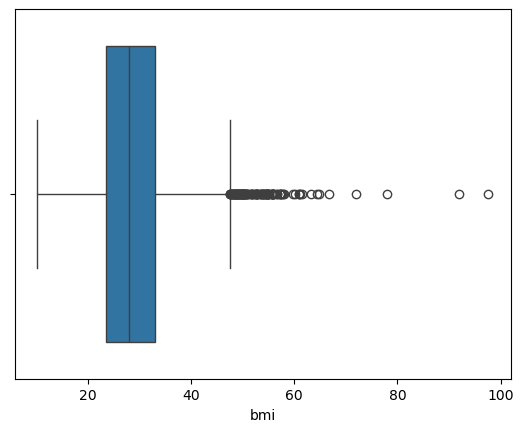

In [28]:
sns.boxplot(x = df['bmi'])

In [29]:
missing_bmi_rows = df[df['bmi'].isna()]

In [30]:
missing_bmi_rows

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,Senior
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1,Senior
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1,Senior
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0,Middle-aged Adult
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0,Middle-aged Adult
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0,Middle-aged Adult
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0,Middle-aged Adult


- we will fill the missing values after split data to train test split

<Axes: xlabel='hypertension', ylabel='count'>

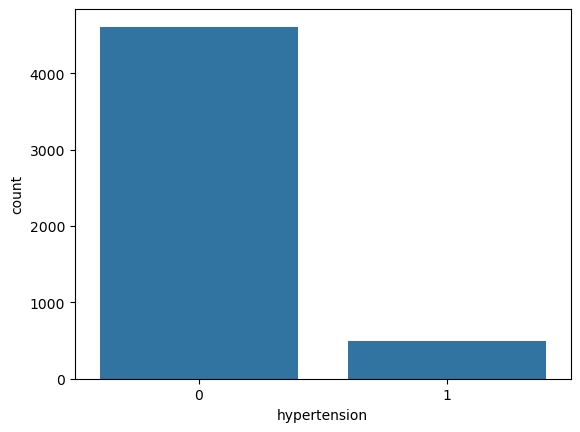

In [31]:
sns.countplot(x = df['hypertension'])

In [32]:
df.hypertension.value_counts()

hypertension
0    4611
1     498
Name: count, dtype: int64

<Axes: xlabel='heart_disease', ylabel='count'>

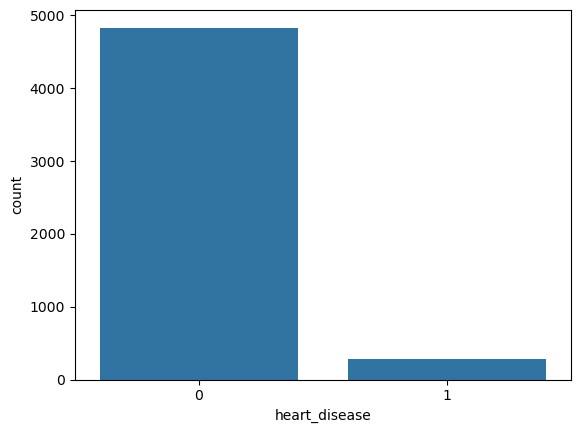

In [33]:
sns.countplot(x = df['heart_disease'])

In [34]:
df.heart_disease.value_counts()

heart_disease
0    4833
1     276
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

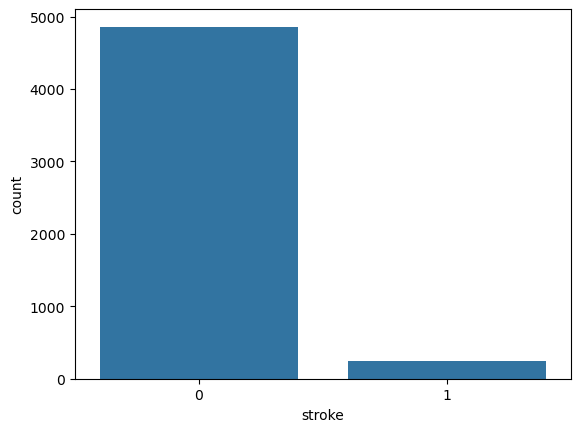

In [35]:
sns.countplot(x = df['stroke'])

In [36]:
df.stroke.value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

<Axes: xlabel='avg_glucose_level'>

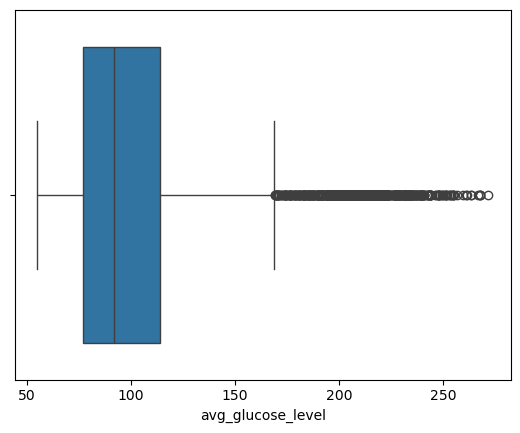

In [37]:
sns.boxplot(x = df['avg_glucose_level'])

- Categorize avg_glucose_level

In [38]:
def categorize_glucose_level(glucose_level):
    if glucose_level < 70:
        return 'Low'
    elif 70 <= glucose_level <= 99:
        return 'Normal'
    elif 100 <= glucose_level <= 125:
        return 'Prediabetes'
    else:
        return 'Diabetes'
df['glucose_level_category'] = df['avg_glucose_level'].apply(categorize_glucose_level)

In [39]:
df.glucose_level_category.value_counts()

glucose_level_category
Normal         2317
Diabetes       1059
Prediabetes     979
Low             754
Name: count, dtype: int64

<Axes: xlabel='glucose_level_category', ylabel='count'>

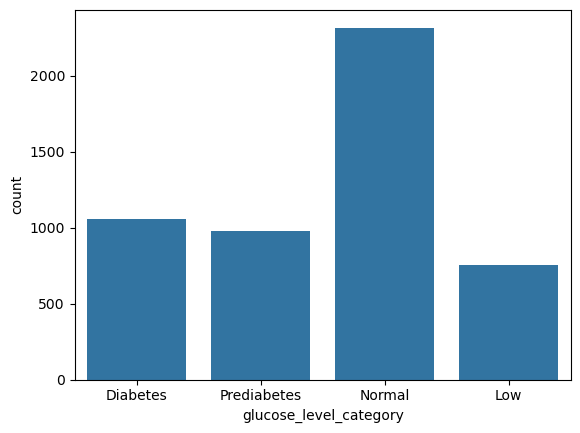

In [40]:
sns.countplot(x = df['glucose_level_category'])

# feature Engineering

- Add 'has_diabetes' feature

In [41]:
df['has_diabetes'] = df['avg_glucose_level'].apply(lambda x: 1 if x >= 140 else 0)

In [42]:
df.drop('avg_glucose_level' , axis=1 , inplace = True)

In [43]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,age_category,glucose_level_category,has_diabetes
0,Male,67.0,0,1,Yes,Private,Urban,36.6,formerly smoked,1,Senior,Diabetes,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,NaN,never smoked,1,Senior,Diabetes,1
2,Male,80.0,0,1,Yes,Private,Rural,32.5,never smoked,1,Senior,Prediabetes,0
3,Female,49.0,0,0,Yes,Private,Urban,34.4,smokes,1,Middle-aged Adult,Diabetes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,24.0,never smoked,1,Senior,Diabetes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,NaN,never smoked,0,Senior,Normal,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,40.0,never smoked,0,Senior,Diabetes,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,30.6,never smoked,0,Middle-aged Adult,Normal,0
5108,Male,51.0,0,0,Yes,Private,Rural,25.6,formerly smoked,0,Senior,Diabetes,1


In [44]:
from sklearn.preprocessing import StandardScaler , PolynomialFeatures , OneHotEncoder ,OrdinalEncoder ,MinMaxScaler ,RobustScaler
from category_encoders import BinaryEncoder
from sklearn.impute import KNNImputer , SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB ,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier , GradientBoostingClassifier ,ExtraTreesClassifier ,VotingClassifier
from xgboost import XGBClassifier


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score , confusion_matrix , ConfusionMatrixDisplay ,fbeta_score
from sklearn.model_selection import cross_validate , GridSearchCV ,StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectFromModel

from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc


In [45]:
df.drop('age' ,axis = 1 , inplace = True)

In [46]:
x ,  y = df.drop(['stroke'] , axis = 1 ) , df['stroke']

- category columns 

In [47]:
for col in df.select_dtypes('object').columns :
    
    print(f'{col} -- {df[col].nunique()}')

gender -- 2
ever_married -- 2
work_type -- 4
Residence_type -- 2
smoking_status -- 4
age_category -- 5
glucose_level_category -- 4


In [48]:
df.select_dtypes('object').isnull().mean()*100

gender                    0.0
ever_married              0.0
work_type                 0.0
Residence_type            0.0
smoking_status            0.0
age_category              0.0
glucose_level_category    0.0
dtype: float64

In [49]:
df['age_category'].unique()

array(['Senior', 'Middle-aged Adult', 'Child', 'Young Adult', 'Teenager'],
      dtype=object)

In [50]:
ord_cat = ['Low', 'Normal', 'Prediabetes', 'Diabetes']
ord_age = ['Child','Teenager','Young Adult','Middle-aged Adult' ,'Senior']

ord_ecdr = OrdinalEncoder(categories=[ord_cat])
ord_ecdr2 = OrdinalEncoder(categories=[ord_age])

cat_ord_pl = make_pipeline(ord_ecdr)
cat_ord_pl2 = make_pipeline(ord_ecdr2)


cat_ohe_pl = make_pipeline(OneHotEncoder(sparse_output=False , drop = 'first'))

cat_preprocessing = ColumnTransformer(transformers=[
    ('cat_ohe_pl' , cat_ohe_pl , ['gender', 'ever_married','work_type' , 'Residence_type' , 'smoking_status']),
    ('cat_ord_pl', cat_ord_pl, ['glucose_level_category' ]) ,
    ('cat_ord_pl2', cat_ord_pl2, ['age_category' ])
] , remainder='passthrough')

cat_preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_ohe_pl',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type', 'smoking_status']),
                                ('cat_ord_pl',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Normal',
                                                                              'Prediabetes',
                                                                              'Diabetes']]))]),
                                 ['glucose_level_category']),
                                ('cat_ord_pl2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Child',
                                                                              'Teenager',
                                                                              'Young '
                                                                              'Adult',
                                                                              'Middle-aged '
                                                                              'Adult',
                                                                              'Senior']]))]),
                                 ['age_category'])])

In [51]:
x.select_dtypes('number').columns 

Index(['hypertension', 'heart_disease', 'bmi', 'has_diabetes'], dtype='object')

In [52]:
x.select_dtypes('object').columns 

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status', 'age_category', 'glucose_level_category'],
      dtype='object')

In [53]:
cat_preprocessing.fit_transform(x.select_dtypes('object'))

array([[1., 1., 1., ..., 0., 3., 4.],
       [0., 1., 0., ..., 0., 3., 4.],
       [1., 1., 1., ..., 0., 2., 4.],
       ...,
       [0., 1., 0., ..., 0., 1., 3.],
       [1., 1., 1., ..., 0., 3., 4.],
       [0., 1., 0., ..., 0., 1., 3.]])

- numeric columns 

In [54]:
x.select_dtypes('number').isnull().sum()

hypertension       0
heart_disease      0
bmi              201
has_diabetes       0
dtype: int64

In [55]:
log_transformer = FunctionTransformer(func=np.log, validate=True)

num_imp_log = make_pipeline(
    KNNImputer(n_neighbors=5),
    log_transformer
)
num_preprocessing = ColumnTransformer(transformers=[('num_imp_log' , num_imp_log , ['bmi'])] , remainder='passthrough')

num_preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_imp_log',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<ufunc 'log'>,
                                                                      validate=True))]),
                                 ['bmi'])])

In [56]:
num_preprocessing.fit_transform(x.select_dtypes('number'))

array([[3.60004824, 0.        , 1.        , 1.        ],
       [3.36365334, 0.        , 0.        , 1.        ],
       [3.48124009, 0.        , 1.        , 0.        ],
       ...,
       [3.42100001, 0.        , 0.        , 0.        ],
       [3.24259235, 0.        , 0.        , 1.        ],
       [3.26575941, 0.        , 0.        , 0.        ]])

In [57]:
preprocessing = ColumnTransformer(transformers=[
    
    ('cat_preprocessing' ,cat_preprocessing , ['gender', 'ever_married','work_type' , 'Residence_type' , 'smoking_status' ,'glucose_level_category','age_category'] ),
    
    ('num_preprocessing' , num_preprocessing , ['bmi'])
    
] , remainder='passthrough')

preprocessing




ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_preprocessing',
                                 ColumnTransformer(remainder='passthrough',
                                                   transformers=[('cat_ohe_pl',
                                                                  Pipeline(steps=[('onehotencoder',
                                                                                   OneHotEncoder(drop='first',
                                                                                                 sparse_output=False))]),
                                                                  ['gender',
                                                                   'ever_married',
                                                                   'work_type',
                                                                   'Residence_type',
                                                                   'smoking_status']),
                                                                 ('cat_ord_pl',
                                                                  Pipeline(steps=[('ordinalencoder...
                                                                  ['age_category'])]),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type', 'smoking_status',
                                  'glucose_level_category', 'age_category']),
                                ('num_preprocessing',
                                 ColumnTransformer(remainder='passthrough',
                                                   transformers=[('num_imp_log',
                                                                  Pipeline(steps=[('knnimputer',
                                                                                   KNNImputer()),
                                                                                  ('functiontransformer',
                                                                                   FunctionTransformer(func=<ufunc 'log'>,
                                                                                                       validate=True))]),
                                                                  ['bmi'])]),
                                 ['bmi'])])

In [58]:
pl = make_pipeline(preprocessing , StandardScaler() , LogisticRegression())
pl

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['gender',
                                                                                    'ever_married',
                                                                                    'work_type',
                                                                                    'Residence_type',
                                                                                    'smoking_status']),
                                                                                  ('cat_ord...
                                                   'glucose_level_category',
                                                   'age_category']),
                                                 ('num_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num_imp_log',
                                                                                   Pipeline(steps=[('knnimputer',
                                                                                                    KNNImputer()),
                                                                                                   ('functiontransformer',
                                                                                                    FunctionTransformer(func=<ufunc 'log'>,
                                                                                                                        validate=True))]),
                                                                                   ['bmi'])]),
                                                  ['bmi'])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [59]:


models = []
models.append(('LR' , LogisticRegression()))
models.append(('KNNC' , KNeighborsClassifier()))
models.append(('SVC' , SVC()))
models.append(('bnb', BernoulliNB()))
models.append(('DTC' , DecisionTreeClassifier()))
models.append(('EXT', ExtraTreesClassifier()))
models.append(('RFC' , RandomForestClassifier()))
models.append(('ADB', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB' , XGBClassifier()))
models.append(('NB' , GaussianNB()))
models.append(('Voting' , VotingClassifier(estimators=[('DTC' , DecisionTreeClassifier()) , 
                                                      ('RF' , RandomForestClassifier()) , 
                                                      ('XG' , XGBClassifier())])))


In [60]:
scoring = ['accuracy' , 'recall' , 'f1' , 'precision']

In [61]:
smt = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
sm = SMOTE(sampling_strategy={1 : 1500})
rm = RandomUnderSampler(sampling_strategy={0 : 2000})

In [62]:
# def ModelScores(X , Y):
#     for model in models :
#         PL = make_pipeline(preprocessing, smt , StandardScaler() if model[0] != 'NB' else MinMaxScaler(), model[1])
#         scores = cross_validate(estimator=PL , X = X , y = Y , cv = 5 , scoring=scoring  , return_train_score=True )
#         print('-'*60)
#         print(model[0])
#         print(f'train accuracy : {scores["train_accuracy"].mean()} , test accuracy : {scores["test_accuracy"].mean()}'.title())
#         print(f'train recall : {scores["train_recall"].mean()} , test recall : {scores["test_recall"].mean()}'.title())
#         print(f'train precision : {scores["train_precision"].mean()} , test precision : {scores["test_precision"].mean()}'.title())
#         print(f'train f1_score : {scores["train_f1"].mean()} , test f1_score : {scores["test_f1"].mean()}'.title())

In [63]:
# ModelScores(x , y)

In [64]:
for model in models :
    PL = make_pipeline(preprocessing, smt , StandardScaler() if model[0] != 'NB' else MinMaxScaler(),
                       SelectFromModel(estimator=RandomForestClassifier()), model[1])
    scores = cross_validate(estimator=PL , X = x , y = y , cv = 5 , scoring=scoring  , return_train_score=True )
    print('-'*60)
    print(model[0])
    print(f'train accuracy : {scores["train_accuracy"].mean()} , test accuracy : {scores["test_accuracy"].mean()}'.title())
    print(f'train recall : {scores["train_recall"].mean()} , test recall : {scores["test_recall"].mean()}'.title())
    print(f'train precision : {scores["train_precision"].mean()} , test precision : {scores["test_precision"].mean()}'.title())
    print(f'train f1_score : {scores["train_f1"].mean()} , test f1_score : {scores["test_f1"].mean()}'.title())


------------------------------------------------------------
LR
Train Accuracy : 0.6099534608565079 , Test Accuracy : 0.6095181233240885
Train Recall : 0.9186683417085426 , Test Recall : 0.9155918367346938
Train Precision : 0.10392587493599763 , Test Precision : 0.10362016983077663
Train F1_Score : 0.18672569623155644 , Test F1_Score : 0.18615357162024093
------------------------------------------------------------
KNNC
Train Accuracy : 0.861420907876006 , Test Accuracy : 0.788417786177168
Train Recall : 0.6495979899497486 , Test Recall : 0.5298775510204081
Train Precision : 0.20677654077230634 , Test Precision : 0.12044207007244538
Train F1_Score : 0.3135897560445179 , Test F1_Score : 0.19609968804092986
------------------------------------------------------------
SVC
Train Accuracy : 0.6493441449835932 , Test Accuracy : 0.6482737272655832
Train Recall : 0.8885477386934675 , Test Recall : 0.8432653061224489
Train Precision : 0.11148992383437022 , Test Precision : 0.10680802454965632
T

In [65]:
pl = make_pipeline(preprocessing, StandardScaler(), sm,rm, PolynomialFeatures(),
                   SelectFromModel(estimator=RandomForestClassifier()), LogisticRegression(class_weight='balanced'))

pl.steps

[('columntransformer',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('cat_preprocessing',
                                   ColumnTransformer(remainder='passthrough',
                                                     transformers=[('cat_ohe_pl',
                                                                    Pipeline(steps=[('onehotencoder',
                                                                                     OneHotEncoder(drop='first',
                                                                                                   sparse_output=False))]),
                                                                    ['gender',
                                                                     'ever_married',
                                                                     'work_type',
                                                                     'Residence_type',
                                            

In [66]:
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  
    'logisticregression__penalty': ['l1', 'l2'], 
    'logisticregression__solver': ['liblinear', 'saga'] , 
    'polynomialfeatures__degree' : [2,3,4]
}

In [67]:
grid_search = GridSearchCV(estimator=pl , param_grid=param_grid ,
                    cv = StratifiedKFold(n_splits=5) , scoring='recall' , return_train_score=True)

In [68]:
grid_search.fit(x ,  y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_preprocessing',
                                                                         ColumnTransformer(remainder='passthrough',
                                                                                           transformers=[('cat_ohe_pl',
                                                                                                          Pipeline(steps=[('onehotencoder',
                                                                                                                           OneHotEncoder(drop='first',
                                                                                                                                         sparse_output=False)...
                                       ('selectfrommodel',
                                        SelectFromModel(estimator=RandomForestClassifier())),
                                       ('logisticregression',
                                        LogisticRegression(class_weight='balanced'))]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear', 'saga'],
                         'polynomialfeatures__degree': [2, 3, 4]},
             return_train_score=True, scoring='recall')

In [69]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga', 'polynomialfeatures__degree': 2}


In [70]:
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Cross-Validation Score: 0.8914285714285715


In [71]:
print("Best estimator:",grid_search.best_estimator_)

Best estimator: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessing',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('cat_ohe_pl',
                                                                                   Pipeline(steps=[('onehotencoder',
                                                                                                    OneHotEncoder(drop='first',
                                                                                                                  sparse_output=False))]),
                                                                                   ['gender',
                                                                                    'ever_married',
                                               

In [72]:
grid_search.cv_results_['mean_train_score'].max()

0.902572864321608

In [73]:
grid_search.cv_results_['mean_test_score'].max()

0.8914285714285715

In [74]:
LR_Model = grid_search.best_estimator_

In [75]:
accuracy_score(LR_Model.predict(x) , y)

0.6212566059894304

In [76]:
fbeta_score(LR_Model.predict(x) , y , beta=0.5)

0.3591954022988506

In [77]:
precision_score(LR_Model.predict(x) , y)

0.9036144578313253

In [78]:
y_pred = cross_val_predict(LR_Model, x, y, cv=5)  

<Figure size 800x600 with 0 Axes>

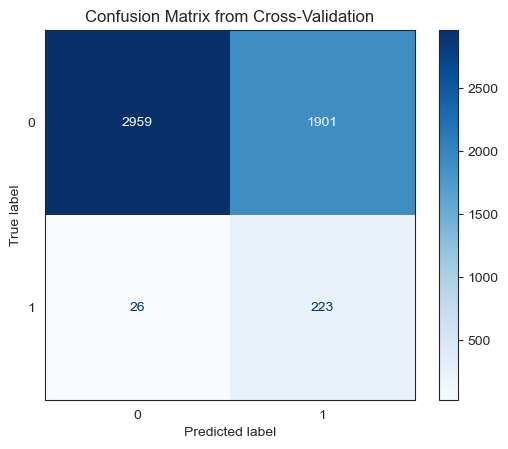

In [79]:
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.set_style('white')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR_Model.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix from Cross-Validation')
plt.show()

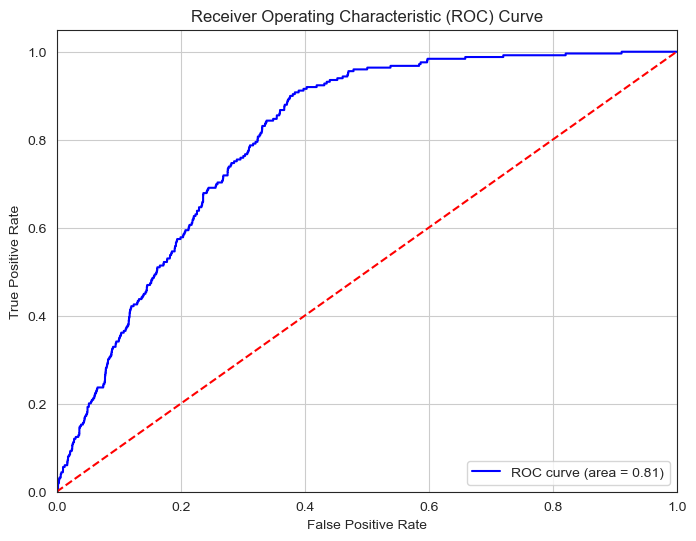

In [80]:
y_scores = cross_val_predict(LR_Model, x, y, cv=5, method='predict_proba')[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [81]:
from joblib import dump

best_model = grid_search.best_estimator_
dump(best_model, 'best_model.joblib')
print("Model saved successfully!")


Model saved successfully!
